In [1]:
     ######clarify variables and files########
%reset -f
!rm *

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#         ######importing csv files: please import Bias_correction_ucl.csv and sobar-72.csv in google colab#####
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# !{sys.executable} -m pip install --upgrade pip

In [2]:
#importing main librarries
import pandas as pd
from pandas.io.formats.info import DataFrameTableBuilderVerbose
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
import io

In [3]:
                   ######seprating features and targets#######
# 
# from keras.src.engine.training import potentially_ragged_
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb

df_1 = pd.read_csv('Data_for_project_kam.csv')
print(df_1)

#seeking for NaNs
print(df_1.isnull().sum())


  #cleaning NaNs
df_1 = df_1.replace('',np.nan)
df_1 = df_1.dropna(axis="rows", how="any")
df_1 = df_1.replace('',np.nan)
print(df_1.isnull().sum())
df_1.shape
 #declaring fetures and outputs
features = ['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'reboiler(pot)_temperature(C)']  # 'condenser_heat_removal(Watt)']
targets = ['reflux_ratio', 'daily_work(min)']
# scale = StandardScaler()
X = df_1[features]
Y = df_1[targets]
X_1 = df_1[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction']]
X_2 = df_1['reboiler(pot)_temperature(C)']

# x = scale.fit_transform(X)
# y = scale.fit_transform(Y)
X = np.array(X)
Y = np.array(Y)
# print(x)
# print(y)
print(X)
print(Y)
# print(type(x))
print(type(X))

# model_1 = RandomForestRegressor()
# # model_1 = xgb.XGBRegressor()
# # model_1.fit(np.array(X_1).reshape(-1,1),np.array(X_2).reshape(-1,1))
# model_1.fit(X_1,X_2)
# X_2 = model_1.predict(X_1)
# new_X_2 = pd.DataFrame(X_2,columns=["new_reboiler(pot)_temperature(C)"])
# df_1.__delitem__('reboiler(pot)_temperature(C)')
# df_1.insert(2, 'new_reboiler(pot)_temperature(C)', new_X_2)
# print(df_1)
X = df_1[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'reboiler(pot)_temperature(C)','condensor_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'condensor_mass_flow_outlet_rate',
          'aceticindutyoverflow',
          'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'reboiler_temp_on_flowrate', 'condensor_temp_on_flowrate', 'reboiler(pot)_heat_duty(Watt)']]# 'condenser_mass_flow_outlet_rate']]
Y = df_1[['reflux_ratio', 'daily_work(min)']]
def pressure_to_boiler_temp(inps):
  df_1 = pd.read_csv('Data_for_project_kam.csv')
  X_1 = df_1[['condensor_pressure(atm)', 'reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction']]
  X_2 = df_1['reboiler(pot)_temperature(C)']
  model = RandomForestRegressor()
  model.fit(X_1,X_2)
  input_data_as_numpy_array = np.asarray(inps)
  input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
  boiler_temp = model.predict(input_data_reshaped)
  return boiler_temp

    ## این جا نیاز نیست یه بار رگرسیون بگیری. با رگرسیون مرتبه 5 که توی اکسله بیا اینجا اول فشار هارو
    ## تبدیل به np.array کن و سپس ببر توی حلقه فوذ ورگرسیون بگیر.
    ## و سپس دوباره اون هارو به دیتا فریم تبدیل کن و بدش به df_1


      condensor_pressure(atm)  reboiler(pot)_heat_duty(Watt)  reflux_ratio  \
0                         0.1                          466.7           0.2   
1                         0.1                          466.7           0.4   
2                         0.1                          466.7           0.6   
3                         0.1                          466.7           0.8   
4                         0.1                          466.7           1.0   
...                       ...                            ...           ...   
1295                      1.0                          933.3          12.2   
1296                      1.0                          933.3          12.4   
1297                      1.0                          933.3          12.6   
1298                      1.0                          933.3          12.8   
1299                      1.0                          933.3          13.0   

      input_mass_fraction_of_acetic_acid  pot_pressure(atm)  da

In [4]:
df_1.shape

(1300, 20)

In [5]:
df_1.describe()

,condensor_pressure(atm),reboiler(pot)_heat_duty(Watt),reflux_ratio,input_mass_fraction_of_acetic_acid,pot_pressure(atm),daily_work(min),produced_acetic_acid_mass_fraction,reboiler(pot)_temperature(C),condensor_temperature(C),upper_product_flow_rate(kg/hr),condensor_mass_flow_outlet_rate,fraction_over_pressure,duty_over_frac_multiplyed_by_pressure,reboiler_temp_on_flowrate,condensor_temp_on_flowrate,upper_product_precent,aceticindutyoverflow,refluxin_pot_devidedby_cond_temp,daily_work_multip_duty,daily_work_multip_fraction_over_duty
count,1300.000000,1300.000000,1300.000000,1300.00,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.550000,700.000000,6.600000,0.99,0.648692,271.418236,0.999470,102.077392,95.134455,1.270713,6.453542,2.927626,2051.227627,135.412253,126.134234,99.947046,825.845220,7.799327,171216.236216,0.479217
std,0.287339,233.389783,3.753777,0.00,0.287339,149.801304,0.001403,15.155106,18.817469,1.189411,2.151374,2.630502,2059.134067,87.011913,83.266327,0.140319,409.777199,1.767608,74888.475017,0.371286
min,0.100000,466.700000,0.200000,0.99,0.198692,54.253100,0.992886,72.548530,56.273718,0.301740,4.224361,0.992886,466.702800,9.687442,7.530771,99.288600,123.763425,0.461985,36630.862970,0.057763
25%,0.300000,466.700000,3.400000,0.99,0.398692,152.528500,0.999874,90.996683,82.763228,0.566231,4.307012,1.249953,895.751557,67.239050,61.135180,99.987450,475.372632,7.069953,106717.488525,0.195249
50%,0.550000,700.000000,6.600000,0.99,0.648692,244.712000,0.999978,104.808722,99.541050,0.846593,6.473134,1.826531,1254.071178,117.638821,108.790177,99.997800,824.765502,8.045106,171268.165900,0.315644
75%,0.800000,933.300000,9.800000,0.99,0.898692,351.414000,0.999995,115.132448,110.890872,1.483040,8.609492,3.333290,2333.502334,181.500635,169.670257,99.999500,1177.546899,8.907031,235682.099900,0.752963
max,1.000000,933.300000,13.000000,0.99,1.098692,632.826000,1.000000,121.671606,118.157013,7.488925,8.986710,10.000000,9392.416426,394.641083,382.763370,100.000000,1546.695546,11.359648,309337.618500,1.355959


In [6]:
X.describe()

,condensor_pressure(atm),produced_acetic_acid_mass_fraction,reboiler(pot)_temperature(C),condensor_temperature(C),upper_product_flow_rate(kg/hr),condensor_mass_flow_outlet_rate,aceticindutyoverflow,pot_pressure(atm),fraction_over_pressure,duty_over_frac_multiplyed_by_pressure,reboiler_temp_on_flowrate,condensor_temp_on_flowrate,reboiler(pot)_heat_duty(Watt)
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.550000,0.999470,102.077392,95.134455,1.270713,6.453542,825.845220,0.648692,2.927626,2051.227627,135.412253,126.134234,700.000000
std,0.287339,0.001403,15.155106,18.817469,1.189411,2.151374,409.777199,0.287339,2.630502,2059.134067,87.011913,83.266327,233.389783
min,0.100000,0.992886,72.548530,56.273718,0.301740,4.224361,123.763425,0.198692,0.992886,466.702800,9.687442,7.530771,466.700000
25%,0.300000,0.999874,90.996683,82.763228,0.566231,4.307012,475.372632,0.398692,1.249953,895.751557,67.239050,61.135180,466.700000
50%,0.550000,0.999978,104.808722,99.541050,0.846593,6.473134,824.765502,0.648692,1.826531,1254.071178,117.638821,108.790177,700.000000
75%,0.800000,0.999995,115.132448,110.890872,1.483040,8.609492,1177.546899,0.898692,3.333290,2333.502334,181.500635,169.670257,933.300000
max,1.000000,1.000000,121.671606,118.157013,7.488925,8.986710,1546.695546,1.098692,10.000000,9392.416426,394.641083,382.763370,933.300000


In [7]:
df_new = pd.read_csv('min_max_duty.csv')

In [32]:
# # Difine Dict with the key-value pair to remap.
# dict = {0.1 : 1, 0.2 : 2, 0.3 : 3, 0.4 : 4, 0.5 : 5, 0.6 : 6, 0.7 : 7, 0.8 : 8, 0.9 : 9, 1 : 10}
# df_5 = df_1.replace({"condensor_pressure(atm)": dict})
# print("After replacing a column values with a dictionary values:\n", df_5)

In [33]:
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
# import xgboost as xgb
# from sklearn.neural_network import MLPClassifier


# X_aval = df_5[['reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'daily_work(min)', 'pot_pressure(atm)']]
# # X_aval = df_1[['daily_work(min)', 'condensor_pressure(atm)']]
# Y_aval = df_5[['condensor_pressure(atm)']]
# # num_classes = 10

# X_aval = np.array(X_aval)
# Y_aval = np.array(Y_aval)
# X_train, X_test, Y_train, Y_test = train_test_split(X_aval, Y_aval , test_size=0.2, random_state=6)

# n_inputs_first = X_aval.shape[1]
# n_outputs_first = Y_aval.shape[1]

# # regressor_xgb = xgb.XGBRegressor(n_estimators=50001)
# regressor_xgb = xgb.XGBRFRegressor()#n_estimators=50001, early_stop_rounds=5000, subsample=0.64, learning_rate=0.0099, min_child_weight=3)#n_estimators=30001,
#                                 #   early_stop_rounds=50,#,
#                                 #   max_depth=4)
# #                                   min_child_weight=7,
# #                                   gamma=0,
# #                                   subsample=0.9,
# #                                   colsample_bytree=1,
# #                                   reg_alpha=0.05,
# #                                   nthread=5,
# #                                   scale_pos_weight=1,
# #                                   objective='reg:squarederror',
# #                                   seed=32,
# #                                   learning_rate=0.00299)

# # # regressor_main = RandomForestRegressor()
# regressor_xgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train),(X_test, Y_test)],verbose=500)



In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data= df_1[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'reboiler(pot)_temperature(C)','condensor_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'condensor_mass_flow_outlet_rate',
            'aceticindutyoverflow',
          'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'reboiler_temp_on_flowrate', 'condensor_temp_on_flowrate', 'reboiler(pot)_heat_duty(Watt)', 'reflux_ratio','daily_work(min)']]

# scale = StandardScaler()
scale = StandardScaler()
normalized_data = scale.fit_transform(data)# axis=0)
# normalized_data = preprocessing.minmax_scale(data ,axis=0)
scaled_data = pd.DataFrame(normalized_data, columns=data.columns)
print(scaled_data)

# X = scaled_data[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)','condensor_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'condensor_mass_flow_outlet_rate',
#                  'produced_acetic_acid_multip_duty_over_upper_flow',
#           'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'reboiler_temp_on_flowrate', 'condensor_temp_on_flowrate', 'reboiler(pot)_heat_duty(Watt)']]# 'condenser_mass_flow_outlet_rate']]
# Y = scaled_data[['reflux_ratio', 'daily_work(min)']]
# print(Y)




# atm_pressure = float(input("please enter the atmosophere or condenser peresure in atm (a number between 0.1 and 1: )"))
# heat_duty_select = float(input("please enter the heat_duty of the heater"+ '\n'+ "insert 1 if this is 466.7 watt "+ '\n'+ "insert 2 if this is 933.3 watt: " + '\n'))
# if heat_duty_select == 1:
#   heat_duty = 466.7
# elif heat_duty_select == 2:
#   heat_duty = 933.3

# acetic_acid_mf = float(input("please insert the acetic acid mass fraction that you prefer in distillate receiver: "))
# inputs = (atm_pressure, heat_duty, acetic_acid_mf)
# boil_temp = pressure_to_boiler_temp(inputs)
# print(boil_temp)


      condensor_pressure(atm)  produced_acetic_acid_mass_fraction  \
0                   -1.566699                           -4.089015   
1                   -1.566699                           -3.347562   
2                   -1.566699                           -2.583295   
3                   -1.566699                           -1.741319   
4                   -1.566699                           -0.969923   
...                       ...                                 ...   
1295                 1.566699                            0.372534   
1296                 1.566699                            0.371822   
1297                 1.566699                            0.373247   
1298                 1.566699                            0.373247   
1299                 1.566699                            0.373247   

      reboiler(pot)_temperature(C)  condensor_temperature(C)  \
0                        -1.947835                 -2.058904   
1                        -1.945060         

c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

In [22]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


X_aval = df_1[['reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'daily_work(min)']]
# X_aval = df_1[['reboiler(pot)_heat_duty(Watt)', 'daily_work(min)']]

# X_aval = df_1[['daily_work(min)', 'condensor_pressure(atm)']]
Y_aval = df_1[['condensor_pressure(atm)']]
# num_classes = 10

X_aval = np.array(X_aval)
Y_aval = np.array(Y_aval)
X_train, X_test, Y_train, Y_test = train_test_split(X_aval, Y_aval , test_size=0.2, random_state=6)

n_inputs_first = X_aval.shape[1]
n_outputs_first = Y_aval.shape[1]

# regressor_xgb = xgb.XGBRegressor(n_estimators=50001)
regressor_xgb = xgb.XGBRegressor(n_estimators=50001, subsample=0.5, learning_rate=0.0051, min_child_weight=3, seed=32, max_depth=9, nthread=2)#n_estimators=30001,
                                #   early_stop_rounds=50,#,
                                #   max_depth=4)
#                                   min_child_weight=7,
#                                   gamma=0,
#                                   subsample=0.9,
#                                   colsample_bytree=1,
#                                   reg_alpha=0.05,
#                                   nthread=5,
#                                   scale_pos_weight=1,
#                                   objective='reg:squarederror',
#                                   seed=32,
#                                   learning_rate=0.00299)

# # regressor_main = RandomForestRegressor()
regressor_xgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train),(X_test, Y_test)],verbose=2000)



[0]	validation_0-rmse:0.28594	validation_1-rmse:0.28751


[2000]	validation_0-rmse:0.03601	validation_1-rmse:0.08252
[4000]	validation_0-rmse:0.02966	validation_1-rmse:0.07737
[6000]	validation_0-rmse:0.02694	validation_1-rmse:0.07636
[8000]	validation_0-rmse:0.02539	validation_1-rmse:0.07577
[10000]	validation_0-rmse:0.02438	validation_1-rmse:0.07538
[12000]	validation_0-rmse:0.02367	validation_1-rmse:0.07524
[14000]	validation_0-rmse:0.02316	validation_1-rmse:0.07516
[16000]	validation_0-rmse:0.02278	validation_1-rmse:0.07513
[18000]	validation_0-rmse:0.02247	validation_1-rmse:0.07525
[20000]	validation_0-rmse:0.02224	validation_1-rmse:0.07520
[22000]	validation_0-rmse:0.02204	validation_1-rmse:0.07523
[24000]	validation_0-rmse:0.02188	validation_1-rmse:0.07533
[26000]	validation_0-rmse:0.02175	validation_1-rmse:0.07525
[28000]	validation_0-rmse:0.02163	validation_1-rmse:0.07525
[30000]	validation_0-rmse:0.02154	validation_1-rmse:0.07528
[32000]	validation_0-rmse:0.02145	validation_1-rmse:0.07535
[34000]	validation_0-rmse:0.02137	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0051, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50001, n_jobs=None, nthread=2,
             num_parallel_tree=None, ...)

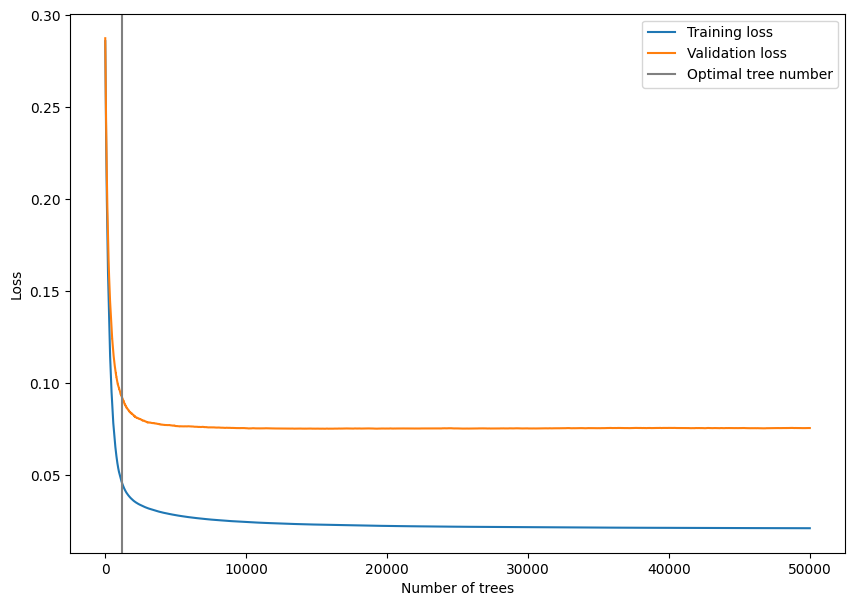

In [13]:
results = regressor_xgb.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(1200, color="gray", label="Optimal tree number")
# plt.xlim([500,3000])
# plt.ylim([22.5,27.5])
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [14]:
from sklearn.metrics import r2_score
# regressor_xgb.fit(X_train,Y_train)
predicted_reboiler_temp_xgb = regressor_xgb.predict(X_test)




# print("neural network regressor r2 socre =", r2_score(Y_test_first_reg,Y_predicted_reboiler_temp))
# print("random forest regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp))
# print("decision tree regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_tree))
# print("linear regression r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_lin))
print("xgboost regressor r2 socre = ", r2_score(Y_test,predicted_reboiler_temp_xgb))

xgboost regressor r2 socre =  0.9313677128730904


In [15]:
pd.DataFrame({'real reboiler duty': Y_test.squeeze(),
              'predicted reboiler duty': predicted_reboiler_temp_xgb.squeeze()})

,real reboiler duty,predicted reboiler duty
0,1.0,1.011030
1,0.1,0.121939
2,0.3,0.264102
3,0.3,0.301316
4,0.8,0.763637
...,...,...
255,0.8,0.798799
256,0.3,0.295420
257,0.5,0.498664
258,0.7,0.728263


In [16]:
import pickle
file_name = "xgb_reg_pressure.pkl"

# save
# pickle.dump(regressor_xgb, open(file_name, "wb"))

# load
xgb_pressure_model_loaded = pickle.load(open(file_name, "rb"))

# test
ind = 1
# test = X_val[ind]
xgb_pressure_model_loaded.predict(X_test)[0] == regressor_xgb.predict(X_test)[0]

Out[1]: True

In [17]:
predicted_reboiler_duty_xgb = xgb_pressure_model_loaded.predict(X_test)


In [18]:
pd.DataFrame({'real daily work': Y_test.squeeze(),
              'predicted daily work(min)': predicted_reboiler_temp_xgb.squeeze()})

,real daily work,predicted daily work(min)
0,1.0,1.011030
1,0.1,0.121939
2,0.3,0.264102
3,0.3,0.301316
4,0.8,0.763637
...,...,...
255,0.8,0.798799
256,0.3,0.295420
257,0.5,0.498664
258,0.7,0.728263


In [ ]:
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

# from sklearn.neural_network import MLPClassifier

# # mlp = MLPClassifier(hidden_layer_sizes=(), 
# #                     solver='lbfgs')





# # X_min_max = df_new[['duty', 'pressure']]
# # Y_min = df_new[['min_daily_work']]
# # Y_max = df_new[['max_daily_work']]

# X_min_max = df_1[['daily_work(min)','produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)']]
# Y_min = df_1[['condensor_pressure(atm)']]
# num_classes = 10

# X_min_max = np.array(X_min_max)
# Y_min = np.array(Y_min)
# # Y_max = np.array(Y_max)
# X_train, X_test, Y_train, Y_test = train_test_split(X_min_max, Y_min , test_size=0.2, random_state=6)
# Y_train = to_categorical(Y_train, num_classes)
# Y_test = to_categorical(Y_test, num_classes)
# n_inputs_first = X_min_max.shape[1]
# n_outputs_first = Y_min.shape[1]

# n_inputs_second = X_min_max.shape[1]

# model = Sequential()
# model.add(Dense(350, input_shape=(n_inputs_first,), activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# # Configure the model and start training
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, Y_train, epochs=1000, batch_size=32, verbose=1, validation_split=0.2)

# # Test the model after training
# test_results = model.evaluate(X_test, Y_test, verbose=1)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')


# # model = tf.keras.models.Sequential([
# #     tf.keras.layers.Flatten(),
# #     tf.keras.layers.Dense(200, activation=tf.nn.softmax)
# # ])
# # model.compile(optimizer='adam',
# # loss='mae')

# # model.fit(X_train, Y_train, epochs=1000)

# # mlp.fit(X_train,Y_train)
# # prob = clf.predict_proba(X_test)

# # prob_mlp = mlp.predict_proba(X_test)
# # take the second probability 
# # (to be in category 1) for each example
# # and reshape it to a 1D array of size 100
# # prob_mlp = prob_mlp[:,1].reshape(len(X_test))
# # plt.plot(X_test, prob, color='red', label='regression')
# # plt.plot(X_test, prob_mlp, color='blue', label='MLP')
# # plt.scatter(x0, y0)
# # plt.scatter(x1, y1)
# # plt.legend()
# # plt.xlabel('x')
# # plt.ylabel('category probability')



# # n_outputs_second = Y_max.shape[1]

# # min_reg_model = Sequential()


# # min_reg_model.add(LSTM(44, recurrent_dropout=0.2, activation='relu', input_shape=(n_inputs_first,1), return_sequences=True))
# # min_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))

# # # first_reg_model.add(LSTM(13, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # # first_reg_model.add(LSTM(14, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # min_reg_model.add(LSTM(50, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # min_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))

# # # first_reg_model.add(LSTM(40, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # # first_reg_model.add(LSTM(10, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # # first_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # min_reg_model.add(LSTM(30, recurrent_dropout=0.2, activation='relu'))
# # # first_reg_model.add(Dense(117, activation='relu'))


# # min_reg_model.add(Dense(120, input_dim=n_inputs_first, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# # min_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
# # min_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
# # min_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
# # min_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
# # min_reg_model.add(Dense(32, kernel_initializer='uniform', activation='relu'))

# # # first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(48, kernel_initializer='uniform', activation='relu'))

# # # first_reg_model.add(GRU(120, recurrent_dropout=0.2, activation='relu', input_shape=(n_inputs_first_reg,1), return_sequences=True))
# # #     # model.add(GRU(n2, recurrent_dropout=0.2, activation='relu'))
# # # first_reg_model.add(Dense(43, activation='relu'))
# # # first_reg_model.add(Dropout(0.2))


# # # first_reg_model.add(Dense(65, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(52, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(39, kernel_initializer='uniform', activation='relu'))
# # # first_reg_model.add(Dense(26, kernel_initializer='uniform', activation='relu'))
# # min_reg_model.add(Dense(n_outputs_first, activation='linear'))
# # opt = optimizers.Adam(learning_rate=0.001)#, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

# # min_reg_model.compile(loss='mae', optimizer='adam')
# # min_reg_model.summary()


In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# data= df_1[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)','condensor_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'condensor_mass_flow_outlet_rate',
#             'aceticindutyoverflow',
#           'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'reboiler_temp_on_flowrate', 'condensor_temp_on_flowrate', 'reboiler(pot)_heat_duty(Watt)', 'reflux_ratio', 'daily_work(min)']]

# # scale = StandardScaler()
# scale = MinMaxScaler()
# normalized_data = scale.fit_transform(data)# axis=0)
# # normalized_data = preprocessing.minmax_scale(data ,axis=0)
# scaled_data = pd.DataFrame(normalized_data, columns=data.columns)
# print(scaled_data)

# X = scaled_data[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)','condensor_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'condensor_mass_flow_outlet_rate',
#                  'produced_acetic_acid_multip_duty_over_upper_flow',
#           'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'reboiler_temp_on_flowrate', 'condensor_temp_on_flowrate', 'reboiler(pot)_heat_duty(Watt)']]# 'condenser_mass_flow_outlet_rate']]
# Y = scaled_data[['reflux_ratio', 'daily_work(min)']]
# print(Y)




# # atm_pressure = float(input("please enter the atmosophere or condenser peresure in atm (a number between 0.1 and 1: )"))
# # heat_duty_select = float(input("please enter the heat_duty of the heater"+ '\n'+ "insert 1 if this is 466.7 watt "+ '\n'+ "insert 2 if this is 933.3 watt: " + '\n'))
# # if heat_duty_select == 1:
# #   heat_duty = 466.7
# # elif heat_duty_select == 2:
# #   heat_duty = 933.3

# # acetic_acid_mf = float(input("please insert the acetic acid mass fraction that you prefer in distillate receiver: "))
# # inputs = (atm_pressure, heat_duty, acetic_acid_mf)
# # boil_temp = pressure_to_boiler_temp(inputs)
# # print(boil_temp)


In [ ]:
# scaled_data.describe()

In [ ]:
# from keras.src.engine.training import potentially_ragged_concat
# from sklearn.ensemble import RandomForestRegressor
# model_1 = RandomForestRegressor()
# model_1.fit(X[:,0].reshape(-1,1),X[:,2].ravel())
# model_1.score(X[:,0].reshape(-1,1),X[:,2].ravel())
# # print(X[:,0].reshape(-1,1))
# pot_temperature = model_1.predict(X[:,0].reshape(-1,1))
# X = pd.DataFrame(X)
# Y = pd.DataFrame(Y)
# pot_temperature = pd.DataFrame(pot_temperature)



# # model_2 = RandomForestRegressor()
# # model_2.fit(X[:,0].reshape(-1,1),X[:,5].ravel())
# # model_2.score(X[:,0].reshape(-1,1),X[:,5].ravel())
# # # print(X[:,0].reshape(-1,1))
# # cond_temperature = model_1.predict(X[:,0].reshape(-1,1))
# # print(cond_temperature)
# # cond_temperature = pd.DataFrame(cond_temperature)

# ###در اینجا به دنبال این باش که این دمای جدید پات را به جای دمای بدست آمده در دیتا فریم قرار بدی. تازه وقتی توان 933.3 را وارد کردی هم یه بار دیگه باید مدل فیت کنی. و همچنین باید برای دمای کندانسورهم این کار رو بکنی






In [ ]:
   ###design a class or function for your neural network
   ## gggrelu bashe activation
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense




# def main_network(n_inputs, n_outputs):
#   main_model = Sequential()
#   main_model.add(Dense(120, input_dim=n_inputs, kernel_initializer='uniform', activation='relu'))
#   main_model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
#   main_model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
#   main_model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
#   main_model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
#   main_model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
#   # main_model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
# #   main_model.add(Dense(20, kernel_initializer='random_normal', activation='relu'))
# #   main_model.add(Dense(20, kernel_initializer='random_normal', activation='relu'))
#   opt = optimizers.Adam(learning_rate=0.01, beta_1=0.75, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')
#   main_model.add(Dense(n_outputs))
#   main_model.compile(loss='mae', optimizer=opt)
  
  
#   mylayers = main_model.layers
#   for layer in mylayers:
#       if hasattr(layer, 'get_weights'):
#           weights, biases = layer.get_weights()
#           print('Layer Name:', layer.name)
#           print('Weights:', weights)
#           print('Biases:', biases)
 
  # return main_model


In [ ]:
# import sys
# !{sys.executable} -m pip install opytimizer


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, GRU, LSTM, Conv1D, Flatten #CuDNNLSTM
# from keras import optimizers
# from opytimizer import Opytimizer
# from opytimizer.core import Function
# from opytimizer.optimizers.swarm import PSO
# from opytimizer.spaces import SearchSpace


# def main_network(n_inputs, n_outputs):
#     main_model = Sequential()
    
#     # main_model.add(LSTM(63, input_shape=n_inputs, activation='relu', return_sequences=True))
#     main_model.add(GRU(72,input_shape=n_inputs,activation='relu', return_sequences=True,))
#     # main_model.add(GRU(14,input_shape=n_inputs,activation='relu', return_sequences=True))
#     main_model.add(Dropout(0.2))
    
#     # main_model.add(LSTM(63, activation='relu'))
#     main_model.add(GRU(72,activation='relu'))
#     # main_model.add(GRU(14,activation='relu'))
#     main_model.add(Dropout(0.2))
    
 
    
#     main_model.add(Dense(18, activation='relu'))
#     # main_model.add(Dense(5, activation='relu'))
#     main_model.add(Dropout(0.2))
    

    
#     main_model.add(Dense(n_outputs))
    
#     opt = optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.7, epsilon=1e-7, amsgrad=False, name='Adam')
#     # opt = PSO()
#     main_model.compile(loss='mae', optimizer=opt)
 
#     return main_model

    

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, Flatten #CuDNNLSTM
# from keras import optimizers

# def main_network(n_inputs, n_outputs):
#     main_model = Sequential()
#     main_model.add(Conv1D(72, input_shape=n_inputs, activation="relu", kernel_size=3))
#     main_model.add(Flatten())
#     main_model.add(Dense(64, activation="relu"))
#     main_model.add(Dense(n_outputs))
    
#     opt = optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.7, epsilon=1e-7, amsgrad=False, name='Adam')
#     main_model.compile(loss='mae', optimizer=opt)
#     return main_model

In [ ]:
# # evaluate a model using repeated k-fold cross-validation
# from sklearn.model_selection import RepeatedKFold
# from numpy import mean
# from numpy import std
# from keras.callbacks import EarlyStopping

# def evaluate_model(X, Y):
#     results = list()
#     # n_inputs = X.shape[1:]
#     n_inputs = X.shape[1]
#     n_outputs = Y.shape[1]
 	
# 	# define evaluation procedure
#     cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# 	# enumerate folds	
#     num_of_stages = 0
#     stages = []
#     for train_ix, test_ix in cv.split(X):
#         X_train, X_test = X[train_ix], X[test_ix]
#         Y_train, Y_test = Y[train_ix], Y[test_ix]
        
#         model = main_network(n_inputs, n_outputs)
#         es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)
#         model.fit(X_train, Y_train, verbose=0, epochs=100,callbacks=es)
#         mae = model.evaluate(X_test, Y_test, verbose=0)
#         num_of_stages += 1
#         print(num_of_stages, '>', 'mean absolute error=', '%.3f' %  mae)
#         results.append(mae)
#         stages.append(num_of_stages)
    
#     stage_min = results.index(min(results))
#     stage_min +=1
#     print('MAE: %.3f (%.3f)' % (mean(results), std(results)))
#     print('minimum mae: ', '%.3f' %  min(results), 'its stage number is', '%.3f' % stage_min)
#     # print(model.predict(X[5][:][0]))
#     plt.plot(stages , results)
#     plt.title("evaluation of network")
#     plt.xlabel("number of stages")
#     plt.ylabel("mean absolute errors")
#     # plt.ylim([0,0.1])
#     plt.show()
    
#     return results

In [ ]:
# # mlp for multi-output regression
# from sklearn.model_selection import train_test_split
# X = np.array(X)
# Y = np.array(Y)
# X_n = X.reshape((X.shape[0], X.shape[1], 1))


# results = evaluate_model(X, Y)





In [ ]:
# from tensorflow import keras
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, GRU
# from sklearn.model_selection import train_test_split

# Xgru = np.array(X)
# Ygru = np.array(Y)
# X_n = Xgru.reshape((Xgru.shape[0], Xgru.shape[1], 1))
# Xgru_train, Xgru_test, Ygru_train, Ygru_test = train_test_split(X_n, Y , test_size=0.2, random_state=6)
# n_inputs = Xgru_train.shape[1:]
# n_outputs = Ygru_train.shape[1]

# reg_model = Sequential()
# # Add a GRU layer with 120 units.
# reg_model.add(GRU(120, activation = "tanh", recurrent_activation = "sigmoid", input_shape=n_inputs))

# # Add a dropout layer (penalizing more complex models) -- prevents overfitting
# reg_model.add(Dropout(rate=0.2))

# # reg_model.add(GRU(120,activation='relu'))
# #     # main_model.add(GRU(14,activation='relu')) 
# # reg_model.add(Dropout(0.2))

# reg_model.add(Dense(48, activation='relu'))
#     # main_model.add(Dense(5, activation='relu'))
# reg_model.add(Dropout(0.2))

# # Add a Dense layer with 1 units (Since we are doing a regression task.
# reg_model.add(Dense(n_outputs))
# # Evaluating loss function of MSE using the adam optimizer.
# opt = optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')
# reg_model.compile(loss='mean_squared_error', optimizer = opt)

# # Print out architecture.
# reg_model.summary()



In [ ]:
# type(Xgru_test)
# Xgru_test.shape

In [ ]:
# # Fitting the data
# history_a = reg_model.fit(Xgru_train,
#                     Ygru_train,
#                     shuffle = False, # Since this is time series data
#                     epochs=3000,
#                     batch_size=60,
#                     validation_split=0.2,
#                     verbose=1) # Verbose outputs data



In [ ]:
# # Plotting the loss iteration
# plt.plot(history.history['loss'], label = 'training loss')
# plt.plot(history.history['val_loss'], label ='validation loss')
# # plt.ylim([0,5000])
# plt.legend()
# # Note:
# # if training loss >> validation loss -> Underfitting
# # if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# # Several ways to address overfitting:
# # Reduce complexity of model (hidden layers, neurons, parameters input etc)
# # Add dropout and tune rate
# # More data :)

In [ ]:
# Xgru_test_new = pd.DataFrame(Xgru_test[1:].reshape(-1))
# Y_pred_general = reg_model.predict(Xgru_test_new.tail(260))

# Ygru_predicted_reflux_ratio = pd.DataFrame(Y_pred_general.transpose()[0])
# Ygru_predicted_daily_work = pd.DataFrame(Y_pred_general.transpose()[1])
# Ygru_test_new = pd.DataFrame(Ygru_test).tail(260)
# Ygru_test_reflux_ratio = pd.DataFrame(Ygru_test_new.values.transpose()[0])
# Ygru_test_daily_work = pd.DataFrame(Ygru_test_new.values.transpose()[1])
# pd.DataFrame({'real reflux ratio': Ygru_test_reflux_ratio.squeeze(),
#               'predicted reflux ratio': Ygru_predicted_reflux_ratio.squeeze(),
#               'real daily work time': Ygru_test_daily_work.squeeze(),
#               'predicted daily work time' : Ygru_predicted_daily_work.squeeze()})

In [ ]:
from sklearn.model_selection import train_test_split

X_dense = np.array(X)
Y_dense = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_dense, Y_dense , test_size=0.2, random_state=6)

In [ ]:
# # python implementation of Grey wolf optimization (GWO)
# # minimizing rastrigin and sphere function

# import random
# import math # cos() for Rastrigin
# import copy # array-copying convenience
# import sys	 # max float


# #-------fitness functions---------

# # rastrigin function
# def fitness_rastrigin(position):
#     fitness_value = 0.0
#     for i in range(len(position)):
#         xi = position[i]
#         fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
#     return fitness_value

# #sphere function
# def fitness_sphere(position):
# 	fitness_value = 0.0
# 	for i in range(len(position)):
# 		xi = position[i]
# 		fitness_value += (xi*xi);
# 	return fitness_value;
# #-------------------------


# # wolf class 
# class wolf:
#     def __init__(self, fitness, dim, minx, maxx, seed):
#         self.rnd = random.Random(seed)
#         self.position = [0.0 for i in range(dim)]

#         for i in range(dim):
#             self.position[i] = ((maxx - minx) * self.rnd.random() + minx)

#         self.fitness = fitness(self.position) # curr fitness



# # grey wolf optimization (GWO)
# def gwo(fitness, max_iter, n, dim, minx, maxx):
# 	rnd = random.Random(0)

# 	# create n random wolves 
# 	population = [ wolf(fitness, dim, minx, maxx, i) for i in range(n)]

# 	# On the basis of fitness values of wolves 
# 	# sort the population in asc order
# 	population = sorted(population, key = lambda temp: temp.fitness)

# 	# best 3 solutions will be called as 
# 	# alpha, beta and gaama
# 	alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])


# 	# main loop of gwo
# 	Iter = 0
# 	while Iter < max_iter:

# 		# after every 10 iterations 
# 		# print iteration number and best fitness value so far
# 		if Iter % 10 == 0 and Iter > 1:
# 			print("Iter = " + str(Iter) + " best fitness = %.3f" % alpha_wolf.fitness)

# 		# linearly decreased from 2 to 0
# 		a = 2*(1 - Iter/max_iter)

# 		# updating each population member with the help of best three members 
# 		for i in range(n):
# 			A1, A2, A3 = a * (2 * rnd.random() - 1), a * (
# 			2 * rnd.random() - 1), a * (2 * rnd.random() - 1)
# 			C1, C2, C3 = 2 * rnd.random(), 2*rnd.random(), 2*rnd.random()

# 			X1 = [0.0 for i in range(dim)]
# 			X2 = [0.0 for i in range(dim)]
# 			X3 = [0.0 for i in range(dim)]
# 			Xnew = [0.0 for i in range(dim)]
# 			for j in range(dim):
# 				X1[j] = alpha_wolf.position[j] - A1 * abs(
# 				C1 * alpha_wolf.position[j] - population[i].position[j])
# 				X2[j] = beta_wolf.position[j] - A2 * abs(
# 				C2 * beta_wolf.position[j] - population[i].position[j])
# 				X3[j] = gamma_wolf.position[j] - A3 * abs(
# 				C3 * gamma_wolf.position[j] - population[i].position[j])
# 				Xnew[j]+= X1[j] + X2[j] + X3[j]
			
# 			for j in range(dim):
# 				Xnew[j]/=3.0
			
# 			# fitness calculation of new solution
# 			fnew = fitness(Xnew)

# 			# greedy selection
# 			if fnew < population[i].fitness:
# 				population[i].position = Xnew
# 				population[i].fitness = fnew
				
# 		# On the basis of fitness values of wolves 
# 		# sort the population in asc order
# 		population = sorted(population, key = lambda temp: temp.fitness)

# 		# best 3 solutions will be called as 
# 		# alpha, beta and gaama
# 		alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])
		
# 		Iter+= 1
# 	# end-while

# 	# returning the best solution
# 	return alpha_wolf.position
		
# #----------------------------


# # Driver code for rastrigin function

# print("\nBegin grey wolf optimization on rastrigin function\n")
# dim = 3
# fitness = fitness_rastrigin


# print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
# print("Function has known min = 0.0 at (", end="")
# for i in range(dim-1):
#     print("0, ", end="")
# print("0)")

# num_particles = 50
# max_iter = 100

# print("Setting num_particles = " + str(num_particles))
# print("Setting max_iter = " + str(max_iter))
# print("\nStarting GWO algorithm\n")



# best_position = gwo(fitness, max_iter, num_particles, dim, -10.0, 10.0)

# print("\nGWO completed\n")
# print("\nBest solution found:")
# print(["%.6f"%best_position[k] for k in range(dim)])
# err = fitness(best_position)
# print("fitness of best solution = %.6f" % err)

# print("\nEnd GWO for rastrigin\n")


# print()
# print()


# # Driver code for Sphere function 
# print("\nBegin grey wolf optimization on sphere function\n")
# dim = 3
# fitness = fitness_sphere


# print("Goal is to minimize sphere function in " + str(dim) + " variables")
# print("Function has known min = 0.0 at (", end="")
# for i in range(dim-1):
#     print("0, ", end="")
# print("0)")

# num_particles = 50
# max_iter = 100

# print("Setting num_particles = " + str(num_particles))
# print("Setting max_iter = " + str(max_iter))
# print("\nStarting GWO algorithm\n")



# best_position = gwo(fitness, max_iter, num_particles, dim, -10.0, 10.0)

# print("\nGWO completed\n")
# print("\nBest solution found:")
# print(["%.6f"%best_position[k] for k in range(dim)])
# err = fitness(best_position)
# print("fitness of best solution = %.6f" % err)

# print("\nEnd GWO for sphere\n")


In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_dense = np.array(X)
Y_dense = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_dense, Y_dense , test_size=0.2, random_state=6)
n_inputs_sequ = X_train.shape[1]
n_outputs_sequ = Y_train.shape[1]

main_model = Sequential()
main_model.add(Dense(108, input_dim=n_inputs_sequ, kernel_initializer='uniform', activation='relu'))
main_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
main_model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
main_model.add(Dense(48, kernel_initializer='uniform', activation='relu'))
main_model.add(Dense(36, kernel_initializer='uniform', activation='relu'))
main_model.add(Dense(18, kernel_initializer='uniform', activation='relu'))
main_model.add(Dense(n_outputs_sequ))
opt = optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

main_model.compile(loss='mae', optimizer='adam')
main_model.summary()

In [ ]:
# Fitting the data
history = main_model.fit(X_train,
                    Y_train,
                    #shuffle = False, # Since this is time series data
                    epochs=650,
                    batch_size=65,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

In [ ]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
# plt.ylim([-2,6])
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

In [ ]:
# Predictions using the 'sliding/rolling window approach'
# Multi step forecast.
# Using self predictions for making future predictions
X_test_newa = pd.DataFrame(X_test)
Y_pred_general = main_model.predict(X_test_newa.tail(260))

Y_predicted_reflux_ratio = pd.DataFrame(Y_pred_general.transpose()[0])
Y_predicted_daily_work = pd.DataFrame(Y_pred_general.transpose()[1])
Y_test_new = pd.DataFrame(Y_test).tail(260)
Y_test_reflux_ratio = pd.DataFrame(Y_test_new.values.transpose()[0])
Y_test_daily_work = pd.DataFrame(Y_test_new.values.transpose()[1])
pd.DataFrame({'real reflux ratio': Y_test_reflux_ratio.squeeze(),
              'predicted reflux ratio': Y_predicted_reflux_ratio.squeeze(),
              'real daily work time': Y_test_daily_work.squeeze(),
              'predicted daily work time' : Y_predicted_daily_work.squeeze()})

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_dense = np.array(X)
Y_dense = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_dense, Y_dense , test_size=0.2, random_state=6)
n_inputs_sequ = X_train.shape[1]
n_outputs_sequ = Y_train.shape[1]

main_model_new = Sequential()
main_model_new.add(Dense(108, input_dim=n_inputs_sequ, kernel_initializer='uniform', activation='relu'))
main_model_new.add(Dense(84, kernel_initializer='uniform', activation='relu'))
main_model_new.add(Dense(60, kernel_initializer='uniform', activation='relu'))
main_model_new.add(Dense(48, kernel_initializer='uniform', activation='relu'))
main_model_new.add(Dense(36, kernel_initializer='uniform', activation='relu'))
main_model_new.add(Dense(18, kernel_initializer='uniform', activation='relu'))
main_model_new.add(Dense(n_outputs_sequ))
# opt = optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

# main_model.compile(loss='mae', optimizer='adam')
main_model_new.summary()

In [ ]:
pip install PyYAML

In [ ]:
##serialize model to YAML
from keras.models import model_from_json, load_model

model_json = main_model.to_json()
with open("main_model.json", "w") as json_file:
    json_file.write(model_json)
    
##serialize weights to HDF5
main_model.save_weights("main_model.h5")
print("Saved model to disk")

In [35]:
from keras.models import model_from_json, load_model

##load YAMl and create model
json_file = open('main_model.json', 'r')
loaded_model_yaml = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_yaml)
##load weights into new model
loaded_model.load_weights("main_model.h5")
print("Loaded model from disk")


Loaded model from disk


In [37]:
## evaluate loaded model on test data
from sklearn.model_selection import train_test_split

X_dense = np.array(X)
Y_dense = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_dense, Y_dense , test_size=0.2, random_state=6)
loaded_model.compile(loss='mae',optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 100.00%


In [ ]:
##save model and architecture to single file

In [39]:
mylayers = loaded_model.layers
for layer in mylayers:
    if hasattr(layer, 'get_weights'):
        weights, biases = layer.get_weights()
        print('Layer Name:', layer.name)
        print('Weights:', weights)
        print('Biases:', biases)

Layer Name: dense_79
Weights: [[-0.10979091  0.29034242  0.00806625 ... -0.32547805  0.0280409
  -0.00660197]
 [ 1.0808388   0.13176773 -0.0021444  ...  0.15447743  0.0152758
  -0.09494355]
 [ 0.8782757   0.16494843 -0.02105323 ...  0.03860381  0.03287188
  -0.10707491]
 ...
 [ 0.09349094  0.24843855  0.04670514 ...  0.09624357  0.0210353
  -0.02199644]
 [ 0.07739411  0.23198132 -0.00799726 ...  0.05891927 -0.02680534
  -0.0411574 ]
 [-0.12004768 -0.01308071 -0.00836325 ... -0.06243174 -0.03101786
  -0.03825019]]
Biases: [ 1.07711196e+00  9.30707008e-02  0.00000000e+00  1.87199199e+00
  3.64961147e-01  1.57196522e-01  0.00000000e+00  0.00000000e+00
  4.33511525e-01  1.96776509e-01  8.78424793e-02  1.78905800e-01
  8.72397959e-01  1.44224942e-01  7.33502656e-02  0.00000000e+00
  8.89890343e-02  7.68271238e-02  7.85629749e-02 -3.16129774e-01
  0.00000000e+00  2.07492620e-01  9.97516289e-02  0.00000000e+00
 -4.21487239e-05 -1.07221123e-04  0.00000000e+00  1.18623488e-01
  1.93086132e-01 -

In [ ]:
# regressor_main.fit(X,Y)

#1	466.7	0.99	1.098692327		0.99899	121.6209234	118.0392264	1.444240492	4.332721476	0.99899	467.1718436	84.21099119	81.73100468	99.899	322.8192504
# 2   155.804

inputs = (1, 0.99899, 121.6209234, 118.0392264, 1.444240492, 4.332721476,322.8192504 , 1.098692327, 0.99899, 467.1718436, 84.21099119, 81.73100468, 466.7)
input_data_as_numpy_array = np.asarray(inputs)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
main_model.predict(input_data_reshaped)
# print(results)
#'atmosphere_pressure', 'reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'pot_pressure(atm)', 'condenser_mass_flow_outlet_rate

In [ ]:
##condensor_pressure(atm)	produced_acetic_acid_mass_fraction	new_reboiler(pot)_temperature(C)	condensor_temperature(C)	upper_product_flow_rate(kg/hr)	condensor_mass_flow_outlet_rate	aceticindutyoverflow	
# pot_pressure(atm)	fraction_over_pressure	duty_over_frac_multiplyed_by_pressure	reboiler_temp_on_flowrate	condensor_temp_on_flowrate	reboiler(pot)_heat_duty(Watt)

In [ ]:
# regressor_main.fit(X,Y)

## 2	2.098692327	466.7	0.99	3.972966667	165.749064	163.0687495	0.499823	233.4326352	99.9646	535.1616894		0.999646	144.4940959	0.871764174	3.030305306	142.1574937	1.000000751	4.358820871
## 4  238.378

inputs = (2, 0.999646, 144.4940959, 142.1574937, 0.871764174, 4.358820871 ,535.1616894 , 2.098692327, 0.499823, 233.4326352, 165.749064, 163.0687495, 466.7)
input_data_as_numpy_array = np.asarray(inputs)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
main_model.predict(input_data_reshaped)
# print(results)
#'atmosphere_pressure', 'reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'pot_pressure(atm)', 'condenser_mass_flow_outlet_rate

In [27]:
df_1 = pd.read_csv('Data_for_project_kam.csv')
X_first_reg = df_1[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'daily_work(min)',
                    'daily_work_multip_duty', 'daily_work_multip_fraction_over_duty', 'condensor_pressure(atm)' ]]
Y_first_reg = df_1[['upper_product_flow_rate(kg/hr)']]
# Y_first_reg = df_1[['upper_product_flow_rate(kg/hr)']]

X_py = np.array(X_first_reg)
Y_py = np.array(Y_first_reg)
X_n = X_py.reshape((X_py.shape[0], X_py.shape[1], 1))

X_train_first_reg, X_test_first_reg, Y_train_first_reg, Y_test_first_reg = train_test_split(X_py, Y_py , test_size=0.2, random_state=6)



In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,GRU,Dropout,LSTM
from sklearn.model_selection import train_test_split


X_train_first_reg, X_test_first_reg, Y_train_first_reg, Y_test_first_reg = train_test_split(X_py, Y_py , test_size=0.2, random_state=6)
n_inputs_first_reg = X_train_first_reg.shape[1]
n_outputs_first_reg = Y_train_first_reg.shape[1]

first_reg_model = Sequential()


first_reg_model.add(LSTM(24, recurrent_dropout=0.2, activation='relu', input_shape=(n_inputs_first_reg,1), return_sequences=True))
# first_reg_model.add(LSTM(13, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# first_reg_model.add(LSTM(14, recurrent_dropout=0.2, activation='relu', return_sequences=True))
first_reg_model.add(LSTM(30, recurrent_dropout=0.2, activation='relu', return_sequences=True))
first_reg_model.add(LSTM(40, recurrent_dropout=0.2, activation='relu', return_sequences=True))
first_reg_model.add(LSTM(10, recurrent_dropout=0.2, activation='relu', return_sequences=True))
first_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu', return_sequences=True))
first_reg_model.add(LSTM(10, recurrent_dropout=0.2, activation='relu'))
# first_reg_model.add(Dense(117, activation='relu'))


# first_reg_model.add(Dense(120, input_dim=n_inputs_first_reg, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(48, kernel_initializer='uniform', activation='relu'))

# first_reg_model.add(GRU(120, recurrent_dropout=0.2, activation='relu', input_shape=(n_inputs_first_reg,1), return_sequences=True))
#     # model.add(GRU(n2, recurrent_dropout=0.2, activation='relu'))
# first_reg_model.add(Dense(43, activation='relu'))
# first_reg_model.add(Dropout(0.2))


# first_reg_model.add(Dense(65, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(52, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(39, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(26, kernel_initializer='uniform', activation='relu'))
first_reg_model.add(Dense(n_outputs_first_reg, activation='linear'))
opt = optimizers.Adam(learning_rate=0.001)#, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

first_reg_model.compile(loss='mae', optimizer='adam')
first_reg_model.summary()

In [ ]:
# import torch
# import pygad
# import torch.nn as nn
# from pygad import torchga


# def fitness_func(solution, sol_idx):
#     global data_inputs, data_outputs, torch_ga, model, loss_function

#     model_weights_dict = torchga.model_weights_as_dict(model=model,
#                                                        weights_vector=solution)

#     # Use the current solution as the model parameters.
#     model.load_state_dict(model_weights_dict)

#     predictions = model(data_inputs)
#     abs_error = loss_function(predictions, data_outputs).detach().numpy() + 0.00000001

#     solution_fitness = 1.0 / abs_error

#     return solution_fitness

# def callback_generation(ga_instance):
#     print("Generation = {generation}".format(generation=ga_instance.generations_completed))
#     print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    
    

# X_train_torch = torch.tensor(X_train_first_reg, dtype=torch.float32)
# Y_train_torch = torch.tensor(Y_train_first_reg, dtype=torch.float32)#.reshape(-1,1)
# X_test_torch = torch.tensor(X_test_first_reg, dtype=torch.float32)
# Y_test_torch = torch.tensor(Y_test_first_reg, dtype=torch.float32)#.reshape(-1,1)
# n_inputs_sequ = X_train.shape[1]
# n_outputs_sequ = Y_train.shape[1]

# # Create the PyTorch model.
# model = nn.Sequential(
#     nn.Linear(n_inputs_first_reg, 108),
#     nn.ReLU(),
#     nn.Linear(108, 84),
#     nn.ReLU(),
#     nn.Linear(84, 60),
#     nn.ReLU(),
#     nn.Linear(60, 48),
#     nn.ReLU(),
#     nn.Linear(48, 36),
#     nn.ReLU(),
#     nn.Linear(36, 18),
#     nn.ReLU(),
#     nn.Linear(18, n_outputs_first_reg),
#     nn.Sigmoid())
# # print(model)

# # Create an instance of the pygad.torchga.TorchGA class to build the initial population.
# torch_ga = torchga.TorchGA(model=model,
#                            num_solutions=10)

# loss_function = torch.nn.L1Loss()

# # Data inputs
# data_inputs = X_train_torch

# # Data outputs
# data_outputs = Y_train_torch

# # Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
# num_generations = 250 # Number of generations.
# num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
# initial_population = torch_ga.population_weights # Initial population of network weights
# parent_selection_type = "sss" # Type of parent selection.
# crossover_type = "single_point" # Type of the crossover operator.
# mutation_type = "random" # Type of the mutation operator.
# mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
# keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

# ga_instance = pygad.GA(num_generations=num_generations,
#                        num_parents_mating=num_parents_mating,
#                        initial_population=initial_population,
#                        fitness_func=fitness_func,
#                        parent_selection_type=parent_selection_type,
#                        crossover_type=crossover_type,
#                        mutation_type=mutation_type,
#                        mutation_percent_genes=mutation_percent_genes,
#                        keep_parents=keep_parents,
#                        on_generation=callback_generation)

# ga_instance.run()

# # After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
# ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# # Returning the details of the best solution.
# solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
# print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# # Fetch the parameters of the best solution.
# best_solution_weights = torchga.model_weights_as_dict(model=model,
#                                                       weights_vector=solution)
# model.load_state_dict(best_solution_weights)
# predictions = model(data_inputs)
# print("Predictions : n", predictions.detach().numpy())

# abs_error = loss_function(predictions, data_outputs)
# print("Absolute Error : ", abs_error.detach().numpy())

In [ ]:
X_test_newer = pd.DataFrame(X_test_first_reg)
Y_pred_general = first_reg_model.predict(X_test_newer.tail(260))

Y_predicted_reboiler_temp = pd.DataFrame(Y_pred_general.transpose()[0])
Y_test_newer = pd.DataFrame(Y_test_first_reg).tail(260)
Y_test_reboiler_temp = pd.DataFrame(Y_test_newer.values.transpose()[0])

pd.DataFrame({'real upper_product_flow_rate(kg/hr)': Y_test_reboiler_temp.squeeze(),
              'predicted upper_product_flow_rate(kg/hr)': Y_predicted_reboiler_temp.squeeze()})

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# first_model = RandomForestRegressor()

# first_model.fit(X_train_first_reg,Y_train_first_reg)
# predicted_reboiler_temp = first_model.predict(X_test_first_reg)
# pd.DataFrame({'real reboiler temperature': Y_test_first_reg.squeeze(),
#               'predicted reboiler temperature': predicted_reboiler_temp.squeeze()})



In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# first_model_1 = DecisionTreeRegressor()

# first_model_1.fit(X_train_first_reg,Y_train_first_reg)
# predicted_reboiler_temp_tree = first_model_1.predict(X_test_first_reg)
# pd.DataFrame({'real reboiler temperature': Y_test_first_reg.squeeze(),
#               'predicted reboiler temperature': predicted_reboiler_temp_tree.squeeze()})

In [ ]:
# from sklearn.linear_model import LinearRegression
# first_model_2 = LinearRegression()

# first_model_2.fit(X_train_first_reg,Y_train_first_reg)
# predicted_reboiler_temp_lin = first_model_2.predict(X_test_first_reg)
# pd.DataFrame({'real reboiler temperature': Y_test_first_reg.squeeze(),
#               'predicted reboiler temperature': predicted_reboiler_temp_lin.squeeze()})

In [ ]:
# import xgboost as xgb
# regressor_xgb = xgb.XGBRegressor(n_estimators=30001,
#                                   early_stop_rounds=50,
#                                   max_depth=4,
#                                   min_child_weight=7,
#                                   gamma=0,
#                                   subsample=0.9,
#                                   colsample_bytree=1,
#                                   reg_alpha=0.05,
#                                   nthread=5,
#                                   scale_pos_weight=1,
#                                   objective='reg:squarederror',
#                                   seed=32,
#                                   learning_rate=0.00299)

# # regressor_main = RandomForestRegressor()
# regressor_xgb.fit(X_train_first_reg, Y_train_first_reg, eval_set=[(X_train_first_reg, Y_train_first_reg),(X_test_first_reg, Y_test_first_reg)],verbose=500)

In [ ]:
# results = regressor_xgb.evals_result()

# plt.figure(figsize=(10,7))
# plt.plot(results["validation_0"]["rmse"], label="Training loss")
# plt.plot(results["validation_1"]["rmse"], label="Validation loss")
# plt.axvline(1200, color="gray", label="Optimal tree number")
# # plt.xlim([500,3000])
# # plt.ylim([0,1])
# plt.xlabel("Number of trees")
# plt.ylabel("Loss")
# plt.legend()

In [ ]:
# regressor_xgb.fit(X_train_first_reg,Y_train_first_reg)
# predicted_reboiler_temp_xgb = regressor_xgb.predict(X_test_first_reg)
# pd.DataFrame({'real reboiler temperature': Y_test_first_reg.squeeze(),
#               'predicted reboiler temperature': predicted_reboiler_temp_xgb.squeeze()})

# from sklearn.metrics import r2_score

# print("neural network regressor r2 socre =", r2_score(Y_test_first_reg,Y_predicted_reboiler_temp))
# # print("random forest regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp))
# # print("decision tree regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_tree))
# # print("linear regression r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_lin))
# # print("xgboost regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_xgb))

In [ ]:
# from sklearn.metrics import r2_score

# print("neural network regressor r2 socre =", r2_score(Y_test_first_reg,Y_predicted_reboiler_temp))
# # print("random forest regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp))
# # print("decision tree regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_tree))
# # print("linear regression r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_lin))
# # print("xgboost regressor r2 socre = ", r2_score(Y_test_first_reg,predicted_reboiler_temp_xgb))

In [ ]:
# # regressor_main.fit(X,Y)

# #1	466.7	0.99	1.098692327		0.99899	121.6209234	118.0392264	1.444240492	4.332721476	0.99899	467.1718436	84.21099119	81.73100468	99.899	322.8192504
# # 2   155.804

# # inputs = (1, 0.99899, 121.6209234, 118.0392264, 1.444240492, 4.332721476,322.8192504 , 1.098692327, 0.99899, 467.1718436, 84.21099119, 81.73100468, 466.7)
  
# ##(0.99899, 4667, 1, 1.098692327, 0.99899, 467.1718436)
# ##121.6209234
# inputs_middle = (0.99899, 466.7, 1, 1.098692327, 0.99899, 467.1718436)

# input_data_as_numpy_array = np.asarray(inputs_middle)
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# print("neural network predict =", first_reg_model.predict(input_data_reshaped))
# # print("random forest predict =", first_model.predict(input_data_reshaped))
# # print("decision tree predict =", first_model_1.predict(input_data_reshaped))
# # print("linear reg predict =", first_model_2.predict(input_data_reshaped))
# # print("xgb regressor predict =", regressor_xgb.predict(input_data_reshaped))

# # print(results)
# #'atmosphere_pressure', 'reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'pot_pressure(atm)', 'condenser_mass_flow_outlet_rate

In [ ]:
# # regressor_main.fit(X,Y)

# ## 2	2.098692327	466.7	0.99	3.972966667	165.749064	163.0687495	0.499823	233.4326352	99.9646	535.1616894		0.999646	144.4940959	0.871764174	3.030305306	142.1574937	1.000000751	4.358820871
# ## 4  238.378

# # inputs = (2, 0.999646, 144.4940959, 142.1574937, 0.871764174, 4.358820871 ,535.1616894 , 2.098692327, 0.499823, 233.4326352, 165.749064, 163.0687495, 466.7)
# ##(0.999646, 466.7, 2, 2.098692327, 0.499823, 233.4326352)
# ##  0.871764174
# inputs_outter = (0.999646, 466.7, 238.378, 238.378*466.7, 238.378*0.999646/466.7, 2)
# input_data_as_numpy_array_outter = np.asarray(inputs_outter)
# input_data_reshaped_outter = input_data_as_numpy_array_outter.reshape(1, -1)

# print("neural network predict =", first_reg_model.predict(input_data_reshaped_outter))
# print("random forest predict =", first_model.predict(input_data_reshaped_outter))
# print("decision tree predict =", first_model_1.predict(input_data_reshaped_outter))
# print("linear reg predict =", first_model_2.predict(input_data_reshaped_outter))
# # print("xgb regressor predict =", regressor_xgb.predict(input_data_reshaped_outter))

# # print(results)
# #'atmosphere_pressure', 'reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'pot_pressure(atm)', 'condenser_mass_flow_outlet_rate

In [ ]:
# ##serialize model to YAML
# from keras.models import model_from_json, load_model

# model_neural_json = first_reg_model.to_json()
# with open("first_regression_model_LSTM.json", "w") as json_file:
#     json_file.write(model_neural_json)
    
# ##serialize weights to HDF5
# first_reg_model.save_weights("first_regression_model_LSTM.h5")
# print("Saved model to disk")



Injaaaaaaa


In [25]:
from keras.models import model_from_json, load_model

##load YAMl and create model
json_file = open('first_regression_model_LSTM.json', 'r')
loaded_model_yaml = json_file.read()
json_file.close()
loaded_first_model = model_from_json(loaded_model_yaml)
##load weights into new model
loaded_first_model.load_weights("first_regression_model_LSTM.h5")
print("Loaded model from disk")

Loaded model from disk


In [42]:
mylayers = loaded_first_model.layers
for layer in mylayers:
    if hasattr(layer, 'get_weights'):
        list = layer.get_weights()
        # print(list)
        print('Layer Name:', layer.name)
        print('Weights:', list[0])
        print('Biases:', list[1])
        

Layer Name: lstm_70
Weights: [[ 0.45901623 -0.12439454  0.11801443 -0.0019652   0.16539267  0.22350366
   0.05975538 -0.02709177  0.23366842  0.18492454 -0.17486468  0.23755312
   0.11308366 -0.17391182  0.21730493 -0.13918465  0.23262706 -0.08550993
   0.07923885 -0.105064    0.28653124 -0.1966384  -0.1264682  -0.08410012
  -0.21163161  0.11483707 -0.16217096 -0.0725612   0.19720727 -0.2199276
  -0.09066409 -0.1268039  -0.1836562  -0.20924939  0.13138476 -0.23806913
  -0.01317733 -0.1284809   0.2588184  -0.17522296 -0.14286773 -0.04107932
  -0.4833628  -0.263515    0.29696915  0.22936305  0.16382615 -0.04497731
  -0.02232312 -0.11014356  0.07256072 -0.1413341   0.08478655  0.19572826
  -0.15869887  0.7620996  -0.00644172 -0.36890522  0.1552258  -0.37333348
  -0.12578543  0.01497791  0.03955132  0.33114702  0.04878916  0.26313594
   0.07581703 -0.3728855  -0.2389294  -0.16899377  0.00801092 -0.23150866
   0.30563802  0.1147145   0.02675402 -0.09849118  0.44663677 -0.01808654
  -0.06994

In [43]:
# X_first_reg = df_1[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'daily_work(min)',
#                     'daily_work_multip_duty', 'daily_work_multip_fraction_over_duty']]
# Y_first_reg = df_1[['upper_product_flow_rate(kg/hr)']]
# # Y_first_reg = df_1[['upper_product_flow_rate(kg/hr)']]


# # Y_first_reg = df_1[['upper_product_flow_rate(kg/hr)']]

# X_py = np.array(X_first_reg)
# Y_py = np.array(Y_first_reg)
from sklearn.model_selection import train_test_split


X_train_first_reg, X_test_first_reg, Y_train_first_reg, Y_test_first_reg = train_test_split(X_py, Y_py , test_size=0.1, random_state=6)

In [7]:
X_test_newer = pd.DataFrame(X_test_first_reg)
Y_pred_general = loaded_first_model.predict(X_test_newer.tail(260))

Y_predicted_reboiler_temp = pd.DataFrame(Y_pred_general.transpose()[0])
Y_test_newer = pd.DataFrame(Y_test_first_reg).tail(260)
Y_test_reboiler_temp = pd.DataFrame(Y_test_newer.values.transpose()[0])

pd.DataFrame({'real upper product flow rate(kg/hr)': Y_test_reboiler_temp.squeeze(),
              'predicted upper product flow rate(kg/hr)': Y_predicted_reboiler_temp.squeeze()})

9/9 [==============================] - 1s 4ms/step


,real upper product flow rate(kg/hr),predicted upper product flow rate(kg/hr)
0,0.353886,0.353642
1,1.071235,1.068009
2,0.522495,0.523316
3,0.909646,0.908488
4,2.169553,2.165348
...,...,...
255,2.056071,2.053410
256,0.650351,0.650150
257,0.565703,0.567084
258,0.980836,0.977171


In [45]:
# regressor_main.fit(X,Y)

## 2	2.098692327	466.7	0.99	3.972966667	165.749064	163.0687495	0.499823	233.4326352	99.9646	535.1616894		0.999646	144.4940959	0.871764174	3.030305306	142.1574937	1.000000751	4.358820871
## 4  238.378

# inputs = (2, 0.999646, 144.4940959, 142.1574937, 0.871764174, 4.358820871 ,535.1616894 , 2.098692327, 0.499823, 233.4326352, 165.749064, 163.0687495, 466.7)
##(0.999646, 466.7, 2, 2.098692327, 0.499823, 233.4326352)
##  0.871764174
inputs_outter = (0.999646, 466.7, 238.378, 238.378*466.7, 238.378*0.999646/466.7, 2)
input_data_as_numpy_array_outter = np.asarray(inputs_outter)
input_data_reshaped_outter = input_data_as_numpy_array_outter.reshape(1, -1)

print("neural network predict =", loaded_first_model.predict(input_data_reshaped_outter))
# print("random forest predict =", first_model.predict(input_data_reshaped_outter))
# print("decision tree predict =", first_model_1.predict(input_data_reshaped_outter))
# print("linear reg predict =", first_model_2.predict(input_data_reshaped_outter))
# print("xgb regressor predict =", regressor_xgb.predict(input_data_reshaped_outter))

# print(results)
#'atmosphere_pressure', 'reboiler(pot)_heat_duty(Watt)', 'produced_acetic_acid_mass_fraction', 'new_reboiler(pot)_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'pot_pressure(atm)', 'condenser_mass_flow_outlet_rate

1/1 [==============================] - 1s 865ms/step
neural network predict = [[0.8683878]]


In [23]:
import pandas as pd
df_2 = pd.read_csv('Data_for_project_kam.csv')

In [28]:



Y_pred_whole_first_reg = loaded_first_model.predict(X_py)
new_column = pd.DataFrame(Y_pred_whole_first_reg, columns=["predicted_upper_product_flow_rate(kg/hr)"])



df_2.__delitem__('upper_product_flow_rate(kg/hr)')
df_2.insert(9,'predicted_upper_product_flow_rate(kg/hr)', new_column)



41/41 [==============================] - 1s 3ms/step


In [ ]:
df_1.describe()


In [ ]:
df_2.describe()

In [29]:
# X_second_reg = df_2[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'daily_work(min)',
#                     'daily_work_multip_duty', 'daily_work_multip_fraction_over_duty', 'condensor_pressure(atm)', 'pot_pressure(atm)', 'predicted_upper_product_flow_rate(kg/hr)']]

X_second_reg = df_2[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'condensor_pressure(atm)', 'pot_pressure(atm)','fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure']]

Y_second_reg = df_2[['reboiler(pot)_temperature(C)']]

# X_train_second_reg, X_test_second_reg, Y_train_second_reg, Y_test_second_reg = train_test_split(X_second_reg, Y_second_reg , test_size=0.2, random_state=6)

In [31]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from sklearn.model_selection import train_test_split


X_train_second_reg, X_test_second_reg, Y_train_second_reg, Y_test_second_reg = train_test_split(X_second_reg, Y_second_reg , test_size=0.2, random_state=6)
n_inputs_second_reg = X_second_reg.shape[1]
n_outputs_second_reg = Y_second_reg.shape[1]

second_reg_model = Sequential()
# second_reg_model.add(Dense(105, input_dim=n_inputs_second_reg, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(Dense(n_outputs_second_reg))

second_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='hard_sigmoid', input_shape=(n_inputs_second_reg,1), return_sequences=True))
second_reg_model.add(LSTM(30, recurrent_dropout=0.2, activation='relu', return_sequences=True))
second_reg_model.add(LSTM(24, kernel_initializer='uniform', activation='relu'))

# # second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(LSTM(13, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(LSTM(20, recurrent_dropout=0.2, activation='relu',recurrent_activation='tanh', return_sequences=True))
# second_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# second_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# second_reg_model.add(LSTM(20, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# second_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu'))
second_reg_model.add(Dense(n_outputs_second_reg, activation='linear'))

opt = optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

second_reg_model.compile(loss='mae', optimizer='adam')
second_reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 25)             2700      
                                                                 
 lstm_3 (LSTM)               (None, 6, 30)             6720      
                                                                 
 lstm_4 (LSTM)               (None, 24)                5280      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 14,725
Trainable params: 14,725
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Fitting the data
history_3 = second_reg_model.fit(X_second_reg,
                    Y_second_reg,
                    #shuffle = False, # Since this is time series data
                    epochs=30,
                    batch_size=28,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/30


38/38 [==============================] - 0s 9ms/step - loss: 0.1281 - val_loss: 0.0618
Epoch 2/30
38/38 [==============================] - 0s 8ms/step - loss: 0.1707 - val_loss: 0.2824
Epoch 3/30
38/38 [==============================] - 0s 8ms/step - loss: 0.1393 - val_loss: 0.1478
Epoch 4/30
38/38 [==============================] - 0s 8ms/step - loss: 0.1878 - val_loss: 0.5587
Epoch 5/30
38/38 [==============================] - 0s 8ms/step - loss: 0.2565 - val_loss: 0.2348
Epoch 6/30
38/38 [==============================] - 0s 7ms/step - loss: 0.1616 - val_loss: 0.0840
Epoch 7/30
38/38 [==============================] - 0s 7ms/step - loss: 0.1650 - val_loss: 0.2832
Epoch 8/30
38/38 [==============================] - 0s 7ms/step - loss: 0.1499 - val_loss: 0.3426
Epoch 9/30
38/38 [==============================] - 0s 7ms/step - loss: 0.1678 - val_loss: 0.2772
Epoch 10/30
38/38 [==============================] - 0s 7ms/step - loss: 0.1086 - val_loss: 0.5152
Epoch 11/30
38/38 [===========

In [74]:
X_test_newer_reg_2 = pd.DataFrame(X_test_second_reg)
Y_pred_general_2 = second_reg_model.predict(X_test_newer_reg_2.tail(260))

Y_predicted_upper_flow = pd.DataFrame(Y_pred_general_2.transpose()[0])
Y_test_newer_reg_2 = pd.DataFrame(Y_test_second_reg).tail(260)
Y_test_upper_flow = pd.DataFrame(Y_test_newer_reg_2.values.transpose()[0])

pd.DataFrame({'real REBOILER TEMPERATURE': Y_test_upper_flow.squeeze(),
              'predicted REBOILER TEMPERATURE': Y_predicted_upper_flow.squeeze()})


# X_test_newer = pd.DataFrame(X_test_first_reg)
# Y_pred_general = first_reg_model.predict(X_test_newer.tail(260))

# Y_predicted_reboiler_temp = pd.DataFrame(Y_pred_general.transpose()[0])
# Y_test_newer = pd.DataFrame(Y_test_first_reg).tail(260)
# Y_test_reboiler_temp = pd.DataFrame(Y_test_newer.values.transpose()[0])

# pd.DataFrame({'real upper_product_flow_rate(kg/hr)': Y_test_reboiler_temp.squeeze(),
#               'predicted upper_product_flow_rate(kg/hr)': Y_predicted_reboiler_temp.squeeze()})

9/9 [==============================] - 0s 2ms/step


,real REBOILER TEMPERATURE,predicted REBOILER TEMPERATURE
0,121.671062,121.652542
1,72.833567,72.734955
2,90.997136,90.930214
3,90.996681,90.930275
4,114.972936,115.205124
...,...,...
255,115.125082,115.140671
256,90.995937,90.930428
257,102.634382,102.601685
258,111.399351,111.377327


In [ ]:
print(X_test_second_reg.head(6))
print(Y_test_second_reg.head(6))

In [ ]:
# ##serialize model to YAML
# from keras.models import model_from_json, load_model

# model_neural_json_2 = second_reg_model.to_json()
# with open("second_regression_model.json", "w") as json_file:
#     json_file.write(model_neural_json_2)
    
# ##serialize weights to HDF5
# second_reg_model.save_weights("second_regression_model.h5")
# print("Saved model to disk")




In [57]:
# ##serialize model to YAML
# from keras.models import model_from_json, load_model

# model_neural_json_2 = second_reg_model.to_json()
# with open("second_regression_model_LSTM.json", "w") as json_file:
#     json_file.write(model_neural_json_2)
    
# ##serialize weights to HDF5
# second_reg_model.save_weights("second_regression_model_LSTM.h5")
# print("Saved model to disk")

Saved model to disk


In [75]:
##serialize model to YAML
from keras.models import model_from_json, load_model

model_neural_json_2 = second_reg_model.to_json()
with open("second_regression_model_LSTM_only.json", "w") as json_file:
    json_file.write(model_neural_json_2)
    
##serialize weights to HDF5
second_reg_model.save_weights("second_regression_model_LSTM_only.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# from keras.models import model_from_json, load_model

# ##load YAMl and create model
# json_file = open('second_regression_model.json', 'r')
# loaded_model_yaml = json_file.read()
# json_file.close()
# loaded_second_model = model_from_json(loaded_model_yaml)
# ##load weights into new model
# loaded_second_model.load_weights("second_regression_model.h5")
# print("Loaded model from disk")

In [76]:
from keras.models import model_from_json, load_model

##load YAMl and create model
json_file = open('second_regression_model_LSTM_only.json', 'r')
loaded_model_yaml = json_file.read()
json_file.close()
loaded_second_model = model_from_json(loaded_model_yaml)
##load weights into new model
loaded_second_model.load_weights("second_regression_model_LSTM_only.h5")
print("Loaded model from disk")

Loaded model from disk


In [60]:
from keras.models import model_from_json, load_model

##load YAMl and create model
json_file = open('second_regression_model_LSTM.json', 'r')
loaded_model_yaml = json_file.read()
json_file.close()
loaded_second_model = model_from_json(loaded_model_yaml)
##load weights into new model
loaded_second_model.load_weights("second_regression_model_LSTM.h5")
print("Loaded model from disk")

Loaded model from disk


In [63]:
loaded_second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 25)             2700      
                                                                 
 lstm_3 (LSTM)               (None, 6, 30)             6720      
                                                                 
 lstm_4 (LSTM)               (None, 24)                5280      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 14,725
Trainable params: 14,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mylayers = loaded_second_model.layers
for layer in mylayers:
    if hasattr(layer, 'get_weights'):
        list = layer.get_weights()
        print('Layer Name:', layer.name)
        print('Weights:', list[0])
        print('Biases:', list[1])

In [22]:
X_train_second_reg, X_test_second_reg, Y_train_second_reg, Y_test_second_reg = train_test_split(X_second_reg, Y_second_reg , test_size=0.2, random_state=6)


In [23]:
X_test_newer_reg_2 = pd.DataFrame(X_test_second_reg)
Y_pred_general_2 = second_reg_model.predict(X_test_newer_reg_2.tail(130))

Y_predicted_upper_flow = pd.DataFrame(Y_pred_general_2.transpose()[0])
Y_test_newer_reg_2 = pd.DataFrame(Y_test_second_reg).tail(130)
Y_test_upper_flow = pd.DataFrame(Y_test_newer_reg_2.values.transpose()[0])

pd.DataFrame({'real REBOILER TEMPERATURE': Y_test_upper_flow.squeeze(),
              'predicted REBOILER TEMPERATURE': Y_predicted_upper_flow.squeeze()})

5/5 [==============================] - 0s 2ms/step


ValueError: Data must be 1-dimensional, got ndarray of shape (6, 130) instead

In [24]:
X_test_newer_reg_2 = pd.DataFrame(X_test_second_reg)
Y_pred_general_2 = loaded_second_model.predict(X_test_newer_reg_2.tail(130))

Y_predicted_upper_flow = pd.DataFrame(Y_pred_general_2.transpose()[0])
Y_test_newer_reg_2 = pd.DataFrame(Y_test_second_reg).tail(130)
Y_test_upper_flow = pd.DataFrame(Y_test_newer_reg_2.values.transpose()[0])

pd.DataFrame({'real REBOILER TEMPERATURE': Y_test_upper_flow.squeeze(),
              'predicted REBOILER TEMPERATURE': Y_predicted_upper_flow.squeeze()})

5/5 [==============================] - 1s 3ms/step


,real REBOILER TEMPERATURE,predicted REBOILER TEMPERATURE
0,107.280890,107.045189
1,111.384961,111.297646
2,83.189736,83.142319
3,72.838146,72.896553
4,115.135159,115.100639
...,...,...
125,115.125082,115.094246
126,90.995937,90.865608
127,102.634382,102.495979
128,111.399351,111.304955


In [ ]:
# df_2 = pd.read_csv("Data_for_project_kam.csv")
df_3 = df_2
Y_pred_whole_second_reg = loaded_second_model.predict(X_second_reg)
new_column_2 = pd.DataFrame(Y_pred_whole_second_reg, columns=["predicted_reboiler(pot)_temperature(C)"])

# X_second_reg = X_first_reg.insert(17,'predicted_reboiler(pot)_temperature(C)', new_column)


df_3.__delitem__('reboiler(pot)_temperature(C)')
df_3.insert(7,'predicted_reboiler(pot)_temperature(C)', new_column_2)

In [ ]:
df_2.describe()

In [ ]:
df_3.describe()

INJAAAAAAAAAA

In [ ]:
X_third_reg = df_2[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'daily_work(min)',
                    'daily_work_multip_duty', 'daily_work_multip_fraction_over_duty', 'condensor_pressure(atm)','predicted_upper_product_flow_rate(kg/hr)', 'predicted_reboiler(pot)_temperature(C)']]

Y_third_reg = df_2[['reflux_ratio']]

type(Y_third_reg) 


In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split


X_train_third_reg, X_test_third_reg, Y_train_third_reg, Y_test_third_reg = train_test_split(X_third_reg, Y_third_reg , test_size=0.2, random_state=6)
n_inputs_third_reg = X_train_third_reg.shape[1]
n_outputs_third_reg = Y_train_third_reg.shape[1]

third_reg_model = Sequential()
third_reg_model.add(Dense(108, input_dim=n_inputs_third_reg, kernel_initializer='uniform', activation='relu'))
third_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
third_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
third_reg_model.add(Dense(84, kernel_initializer='uniform', activation='relu'))
third_reg_model.add(Dense(36, kernel_initializer='uniform', activation='relu'))
third_reg_model.add(Dense(18, kernel_initializer='uniform', activation='relu'))

# third_reg_model.add(LSTM(24, recurrent_dropout=0.2, activation='relu', input_shape=(n_inputs_third_reg,1), return_sequences=True))
# third_reg_model.add(Dense(18, kernel_initializer='uniform', activation='relu'))
# third_reg_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
# third_reg_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))

# third_reg_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
# third_reg_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
# third_reg_model.add(LSTM(83, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# third_reg_model.add(Dense(108, kernel_initializer='uniform', activation='relu'))
# # second_reg_model.add(Dense(108, kernel_initializer='uniform', activation='relu'))

# # first_reg_model.add(LSTM(14, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # second_reg_model.add(LSTM(40, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # second_reg_model.add(LSTM(10, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# # second_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# third_reg_model.add(LSTM(20, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# third_reg_model.add(Dense(108, kernel_initializer='uniform', activation='relu'))
# third_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu'))
# third_reg_model.add(Dense(108, kernel_initializer='uniform', activation='relu'))

# second_reg_model.add(Dense(n_outputs_second_reg))

# first_reg_model.add(Dense(39, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(26, kernel_initializer='uniform', activation='relu'))
third_reg_model.add(Dense(n_outputs_third_reg))
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

third_reg_model.compile(loss='mae', optimizer='adam')
third_reg_model.summary()

In [ ]:
# Fitting the data
history_4 = third_reg_model.fit(X_third_reg,
                    Y_third_reg,
                    #shuffle = False, # Since this is time series data
                    epochs=400,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

In [ ]:

# inputs_outter = (0.999646, 466.7, 2, 2.098692327, 0.499823, 233.4326352) 
# input_data_as_numpy_array_outter = np.asarray(inputs_outter)
# input_data_reshaped_outter = input_data_as_numpy_array_outter.reshape(1, -1)

# print("first neural network predicts the rebioler temperature is ", loaded_first_model.predict(input_data_reshaped_outter))

In [ ]:

# inputs_outter = (0.999646, 466.7, 2, 2.098692327, 0.499823, 233.4326352,144.0002)# 144.4940959) 
# input_data_as_numpy_array_outter = np.asarray(inputs_outter)
# input_data_reshaped_outter = input_data_as_numpy_array_outter.reshape(1, -1)

# print("second neural network predicts the condensor flowrate is ", loaded_second_model.predict(input_data_reshaped_outter))

In [ ]:
# # X_third_reg = df_2[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'condensor_pressure(atm)',
# #                     'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'predicted_reboiler(pot)_temperature(C)', 'predicted_condensor_mass_flow_outlet_rate']]
# # Y_third_reg = df_2[['upper_product_flow_rate(kg/hr)']]

# ## 2	2.098692327	466.7	0.99	3.972966667	165.749064	163.0687495	0.499823	233.4326352	99.9646	535.1616894		0.999646	144.4940959	0.871764174	3.030305306	142.1574937	1.000000751	4.358820871
# ## 142.1574937

# inputs_outter = (0.999646, 466.7, 2, 2.098692327, 0.499823, 233.4326352, 144.0002, 4.3136415)# 4.358820871)
# input_data_as_numpy_array_outter = np.asarray(inputs_outter)
# input_data_reshaped_outter = input_data_as_numpy_array_outter.reshape(1, -1)

# print("third neural network predicts the condensor temperature is ", third_reg_model.predict(input_data_reshaped_outter))

In [ ]:
X_test_newer_reg_3 = pd.DataFrame(X_test_third_reg)
Y_pred_general_3 = third_reg_model.predict(X_test_newer_reg_3.tail(130))

Y_predicted_cond_temp = pd.DataFrame(Y_pred_general_3.transpose()[0])
Y_test_newer_reg_3 = pd.DataFrame(Y_test_third_reg).tail(130)
Y_test_cond_temp = pd.DataFrame(Y_test_newer_reg_3.values.transpose()[0])

pd.DataFrame({'real reflux ratio': Y_test_cond_temp.squeeze(),
              'predicted reflux ratio': Y_predicted_cond_temp.squeeze()})

# X_test_newer_reg_2 = pd.DataFrame(X_test_second_reg)
# Y_pred_general_2 = loaded_second_model.predict(X_test_newer_reg_2.tail(130))

# Y_predicted_upper_flow = pd.DataFrame(Y_pred_general_2.transpose()[0])
# Y_test_newer_reg_2 = pd.DataFrame(Y_test_second_reg).tail(130)
# Y_test_upper_flow = pd.DataFrame(Y_test_newer_reg_2.values.transpose()[0])

# pd.DataFrame({'real REBOILER TEMPERATURE': Y_test_upper_flow.squeeze(),
#               'predicted REBOILER TEMPERATURE': Y_predicted_upper_flow.squeeze()})

In [ ]:
##serialize model to YAML
from keras.models import model_from_json, load_model

model_neural_json_3 = third_reg_model.to_json()
with open("third_regression_model.json", "w") as json_file:
    json_file.write(model_neural_json_3)
    
##serialize weights to HDF5
third_reg_model.save_weights("third_regression_model.h5")
print("Saved model to disk")


In [ ]:
from keras.models import model_from_json, load_model

##load YAMl and create model
json_file_3 = open('third_regression_model.json', 'r')
loaded_model_3 = json_file_3.read()
json_file_3.close()
loaded_third_model = model_from_json(loaded_model_3)
##load weights into new model
loaded_third_model.load_weights("third_regression_model.h5")
print("Loaded model from disk")

In [ ]:
X_train_third_reg, X_test_third_reg, Y_train_third_reg, Y_test_third_reg = train_test_split(X_third_reg, Y_third_reg , test_size=0.2, random_state=6)

In [ ]:
X_test_newer_reg_3 = pd.DataFrame(X_test_third_reg)
Y_pred_general_3 = loaded_third_model.predict(X_test_newer_reg_3.tail(60))

Y_predicted_cond_temp = pd.DataFrame(Y_pred_general_3.transpose()[0])
Y_test_newer_reg_3 = pd.DataFrame(Y_test_third_reg).tail(60)
Y_test_cond_temp= pd.DataFrame(Y_test_newer_reg_3.values.transpose()[0])

pd.DataFrame({'real reflux ratio': Y_test_cond_temp.squeeze(),
              'predicted reflux ratio': Y_predicted_cond_temp.squeeze()})

In [ ]:
# Y_pred_whole_third_reg = loaded_third_model.predict(X_third_reg)
# new_column_3 = pd.DataFrame(Y_pred_whole_third_reg, columns=["predicted_condensor_temperature(C)"])

# # X_second_reg = X_first_reg.insert(17,'predicted_reboiler(pot)_temperature(C)', new_column)


# df_2.__delitem__('condensor_temperature(C)')
# df_2.insert(10,'predicted_condensor_temperature(C)', new_column_3)

# df_2 = pd.read_csv("Data_for_project_kam.csv")
df_4 = df_3
Y_pred_whole_third_reg = loaded_third_model.predict(X_third_reg)
new_column_3 = pd.DataFrame(Y_pred_whole_third_reg, columns=["predicted_reflux_ratio"])

# X_second_reg = X_first_reg.insert(17,'predicted_reboiler(pot)_temperature(C)', new_column)


df_4.__delitem__('reflux_ratio')
df_4.insert(2,'predicted_reflux_ratio', new_column_3)

In [ ]:
df_4.describe()

In [ ]:
X_forth_reg = df_2[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'condensor_pressure(atm)', 'pot_pressure(atm)','fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure']]#, 'predicted_upper_product_flow_rate(kg/hr)', 'predicted_reboiler(pot)_temperature(C)', 'predicted_reflux_ratio']]
Y_forth_reg = df_2[['condensor_temperature(C)']]


In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split


X_train_forth_reg, X_test_forth_reg, Y_train_forth_reg, Y_test_forth_reg = train_test_split(X_forth_reg, Y_forth_reg , test_size=0.2, random_state=7)
n_inputs_forth_reg = X_train_forth_reg.shape[1]
n_outputs_forth_reg = Y_train_forth_reg.shape[1]

forth_reg_model = Sequential()
forth_reg_model.add(LSTM(24, recurrent_dropout=0.2, activation='relu', input_shape=(n_inputs_forth_reg,1), return_sequences=True))
# forth_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
forth_reg_model.add(LSTM(13, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# forth_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
# second_reg_model.add(Dense(48, kernel_initializer='uniform', activation='relu'))

# first_reg_model.add(LSTM(14, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# second_reg_model.add(LSTM(40, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# second_reg_model.add(LSTM(10, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# second_reg_model.add(LSTM(25, recurrent_dropout=0.2, activation='relu', return_sequences=True))
forth_reg_model.add(LSTM(18, recurrent_dropout=0.2, activation='relu', return_sequences=True))
# forth_reg_model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
forth_reg_model.add(LSTM(28, recurrent_dropout=0.2, activation='relu'))
# forth_reg_model.add(Dense(n_outputs_second_reg))

forth_reg_model.add(Dense(n_outputs_forth_reg))
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

forth_reg_model.compile(loss='mae', optimizer='adam')
forth_reg_model.summary()

In [ ]:
history_5 = forth_reg_model.fit(X_forth_reg,
                    Y_forth_reg,
                    #shuffle = False, # Since this is time series data
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

In [ ]:
X_test_newer_reg_4 = pd.DataFrame(X_test_forth_reg)
Y_pred_general_4 = forth_reg_model.predict(X_test_newer_reg_4.tail(60))

Y_predicted_cond_temp = pd.DataFrame(Y_pred_general_4.transpose()[0])
Y_test_newer_reg_4 = pd.DataFrame(Y_test_forth_reg).tail(60)
Y_test_cond_temp = pd.DataFrame(Y_test_newer_reg_4.values.transpose()[0])

pd.DataFrame({'real condensor temperature(C)': Y_test_cond_temp.squeeze(),
              'predicted condensor temperature(C)': Y_predicted_cond_temp.squeeze()})

In [ ]:
##serialize model to YAML
from keras.models import model_from_json, load_model

model_neural_json_4 = forth_reg_model.to_json()
with open("fourth_regression_model_LSTM.json", "w") as json_file:
    json_file.write(model_neural_json_4)
    
##serialize weights to HDF5
forth_reg_model.save_weights("fourth_regression_model_LSTM.h5")
print("Saved model to disk")


In [ ]:
from keras.models import model_from_json, load_model

##load YAMl and create model
json_file_4 = open('fourth_regression_model_LSTM.json', 'r')
loaded_model_4 = json_file_4.read()
json_file_3.close()
loaded_fourth_model = model_from_json(loaded_model_4)
##load weights into new model
loaded_fourth_model.load_weights("fourth_regression_model_LSTM.h5")
print("Loaded model from disk")

In [ ]:
X_test_newer_reg_4 = pd.DataFrame(X_test_forth_reg)
Y_pred_general_4 = loaded_fourth_model.predict(X_test_newer_reg_4.tail(60))

Y_predicted_cond_temp = pd.DataFrame(Y_pred_general_4.transpose()[0])
Y_test_newer_reg_4 = pd.DataFrame(Y_test_forth_reg).tail(60)
Y_test_cond_temp = pd.DataFrame(Y_test_newer_reg_4.values.transpose()[0])

pd.DataFrame({'real condensor temperature(C)': Y_test_cond_temp.squeeze(),
              'predicted condensor temperature(C)': Y_predicted_cond_temp.squeeze()})

In [ ]:
from sklearn.model_selection import train_test_split

X_forth_reg_1 = df_2[['produced_acetic_acid_mass_fraction', 'reboiler(pot)_heat_duty(Watt)', 'condensor_pressure(atm)',
                    'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'predicted_reboiler(pot)_temperature(C)', 'predicted_condensor_mass_flow_outlet_rate', 'predicted_condensor_temperature(C)']]#, 'upper_product_flow_rate(kg/hr)']]



Y_forth_reg_1 = df_2[['refluxin_pot_devidedby_cond_temp']]


In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


X_train_forth_reg_1, X_test_forth_reg_1, Y_train_forth_reg_1, Y_test_forth_reg_1 = train_test_split(X_forth_reg_1, Y_forth_reg_1 , test_size=0.2, random_state=6)
n_inputs_forth_reg_1 = X_train_forth_reg_1.shape[1]
n_outputs_forth_reg_1 = Y_train_forth_reg_1.shape[1]

forth_reg_model_1 = Sequential()
forth_reg_model_1.add(Dense(108, input_dim=n_inputs_forth_reg_1, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(84, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(84, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(84, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(84, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(48, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(36, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(18, kernel_initializer='uniform', activation='relu'))

# first_reg_model.add(Dense(39, kernel_initializer='uniform', activation='relu'))
# first_reg_model.add(Dense(26, kernel_initializer='uniform', activation='relu'))
forth_reg_model_1.add(Dense(n_outputs_forth_reg_1))
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.75, epsilon=1e-7, amsgrad=False, name='Adam')

forth_reg_model_1.compile(loss='mae', optimizer='adam')
forth_reg_model_1.summary()

In [ ]:
history_5_1 = forth_reg_model_1.fit(X_train_forth_reg_1,
                    Y_train_forth_reg_1,
                    #shuffle = False, # Since this is time series data
                    epochs=2001,
                    batch_size=65,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

In [ ]:
X_test_newer_reg_4 = pd.DataFrame(X_test_forth_reg)
Y_pred_general_4 = forth_reg_model.predict(X_test_newer_reg_4.tail(260))

Y_predicted_reflux_in_reb_over_cond_temp = pd.DataFrame(Y_pred_general_4.transpose()[0])
Y_test_newer_reg_4 = pd.DataFrame(Y_test_forth_reg).tail(260)
Y_test_reflux_in_reb_over_cond_temp = pd.DataFrame(Y_test_newer_reg_4.values.transpose()[0])

pd.DataFrame({'real condensor temperature': Y_test_reflux_in_reb_over_cond_temp.squeeze(),
              'predicted condensor temperature': Y_predicted_reflux_in_reb_over_cond_temp.squeeze()})

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y , test_size=0.2, random_state=6)

# def FunctionFindBestParams(X_train, y_train, X_test, Y_test):
    
#     batch_size_list = [5, 10, 15, 20, 25]
#     epoch_list = [20, 40, 60, 80, 100]
#     SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
#     TrialNumber=0
#     for batch_size_trial in batch_size_list:
#         for epochs_trial in epoch_list:
#             TrialNumber+=1
#             model = main_model(X_dense.shape[1],Y_dense.shape[1])
#             model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
#             MAPE = np.mean(100 * (np.abs(Y_test-model.predict(X_test))/Y_test))
#             print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
#             SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
#                                                                     columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
#     return(SearchResultsData)
 
 
# ######################################################
# # Calling the function
# ResultsData=FunctionFindBestParams(X_train, Y_train, X_test, Y_test)

In [ ]:
# %matplotlib inline
# ResultsData.plot(x='Parameters', y='Accuracy', figsize=(25,10), kind='line')

In [ ]:
# print(X_n.shape)
# print(X_n.shape[1:])
# print(X_n.shape[1])

In [ ]:
# atm_pressure = float(input("please enter the atmosophere or condenser peresure in atm (a number between 0.1 and 1: )"))
# heat_duty_select = float(input("please enter the heat_duty of the heater"+ '\n'+ "insert 1 if this is 466.7 watt "+ '\n'+ "insert 2 if this is 933.3 watt: " + '\n'))
# if heat_duty_select == 1:
#   heat_duty = 466.7
# elif heat_duty_select == 2:
#   heat_duty = 933.3

# acetic_acid_mf = float(input("please insert the acetic acid mass fraction that you prefer in distillate receiver: "))
# inputs = (atm_pressure, heat_duty, acetic_acid_mf)
# boil_temp = pressure_to_boiler_temp(inputs)
# print(boil_temp)
# main_inputs = (atm_pressure, heat_duty, acetic_acid_mf, boil_temp)
# input_as_numpy_array = np.asarray(main_inputs)
# input_data = input_as_numpy_array.reshape(1, -1)
# print(main_network.predict(input_data))